In [67]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-granularity.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccdgemm,0,16,4,16,2022-04-20T13:10:24Z,2022-04-20T13:10:32Z,2022-04-20T13:27:23Z,2022-04-20T13:27:23Z,17m42.606571128s,36.7922
1,hpccdgemm,1,16,4,16,2022-04-20T13:11:24Z,2022-04-20T13:11:31Z,2022-04-20T13:28:24Z,2022-04-20T13:28:24Z,17m42.629308013s,36.5281
2,hpccdgemm,2,16,4,16,2022-04-20T13:12:24Z,2022-04-20T13:12:31Z,2022-04-20T13:29:28Z,2022-04-20T13:29:28Z,17m42.694683459s,36.4708
3,hpccdgemm,3,16,4,16,2022-04-20T13:13:24Z,2022-04-20T13:13:32Z,2022-04-20T13:30:23Z,2022-04-20T13:30:23Z,17m42.606191423s,36.4259
4,hpccdgemm,4,16,4,16,2022-04-20T13:14:24Z,2022-04-20T13:14:32Z,2022-04-20T13:31:16Z,2022-04-20T13:31:16Z,17m32.600106346s,36.9486
5,hpccdgemm,5,16,4,16,2022-04-20T13:15:25Z,2022-04-20T13:15:32Z,2022-04-20T13:32:10Z,2022-04-20T13:32:10Z,17m21.610888949s,36.8768
6,hpccdgemm,6,16,4,16,2022-04-20T13:16:25Z,2022-04-20T13:16:31Z,2022-04-20T13:33:11Z,2022-04-20T13:33:11Z,17m31.576045512s,36.9790
7,hpccdgemm,7,16,4,16,2022-04-20T13:17:25Z,2022-04-20T13:17:32Z,2022-04-20T13:34:08Z,2022-04-20T13:34:08Z,17m21.591208892s,37.3260
8,hpccdgemm,8,16,4,16,2022-04-20T13:18:25Z,2022-04-20T13:28:14Z,2022-04-20T13:44:25Z,2022-04-20T13:44:25Z,26m41.594958538s,37.7151
9,hpccdgemm,9,16,4,16,2022-04-20T13:19:25Z,2022-04-20T13:29:13Z,2022-04-20T13:45:17Z,2022-04-20T13:45:17Z,26m31.599462006s,38.1294


In [68]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [69]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [70]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccdgemm,0,16,4,16,2022-04-20 13:10:24+00:00,2022-04-20 13:10:32+00:00,2022-04-20 13:27:23+00:00,2022-04-20 13:27:23+00:00,0 days 00:17:42.606571128,36.7922,0 days 00:00:08,0 days 00:16:51,0 days
1,hpccdgemm,1,16,4,16,2022-04-20 13:11:24+00:00,2022-04-20 13:11:31+00:00,2022-04-20 13:28:24+00:00,2022-04-20 13:28:24+00:00,0 days 00:17:42.629308013,36.5281,0 days 00:00:07,0 days 00:16:53,0 days
2,hpccdgemm,2,16,4,16,2022-04-20 13:12:24+00:00,2022-04-20 13:12:31+00:00,2022-04-20 13:29:28+00:00,2022-04-20 13:29:28+00:00,0 days 00:17:42.694683459,36.4708,0 days 00:00:07,0 days 00:16:57,0 days
3,hpccdgemm,3,16,4,16,2022-04-20 13:13:24+00:00,2022-04-20 13:13:32+00:00,2022-04-20 13:30:23+00:00,2022-04-20 13:30:23+00:00,0 days 00:17:42.606191423,36.4259,0 days 00:00:08,0 days 00:16:51,0 days
4,hpccdgemm,4,16,4,16,2022-04-20 13:14:24+00:00,2022-04-20 13:14:32+00:00,2022-04-20 13:31:16+00:00,2022-04-20 13:31:16+00:00,0 days 00:17:32.600106346,36.9486,0 days 00:00:08,0 days 00:16:44,0 days
5,hpccdgemm,5,16,4,16,2022-04-20 13:15:25+00:00,2022-04-20 13:15:32+00:00,2022-04-20 13:32:10+00:00,2022-04-20 13:32:10+00:00,0 days 00:17:21.610888949,36.8768,0 days 00:00:07,0 days 00:16:38,0 days
6,hpccdgemm,6,16,4,16,2022-04-20 13:16:25+00:00,2022-04-20 13:16:31+00:00,2022-04-20 13:33:11+00:00,2022-04-20 13:33:11+00:00,0 days 00:17:31.576045512,36.9790,0 days 00:00:06,0 days 00:16:40,0 days
7,hpccdgemm,7,16,4,16,2022-04-20 13:17:25+00:00,2022-04-20 13:17:32+00:00,2022-04-20 13:34:08+00:00,2022-04-20 13:34:08+00:00,0 days 00:17:21.591208892,37.3260,0 days 00:00:07,0 days 00:16:36,0 days
8,hpccdgemm,8,16,4,16,2022-04-20 13:18:25+00:00,2022-04-20 13:28:14+00:00,2022-04-20 13:44:25+00:00,2022-04-20 13:44:25+00:00,0 days 00:26:41.594958538,37.7151,0 days 00:09:49,0 days 00:16:11,0 days
9,hpccdgemm,9,16,4,16,2022-04-20 13:19:25+00:00,2022-04-20 13:29:13+00:00,2022-04-20 13:45:17+00:00,2022-04-20 13:45:17+00:00,0 days 00:26:31.599462006,38.1294,0 days 00:09:48,0 days 00:16:04,0 days


In [71]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [72]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccdgemm,0,16,4,16,2022-04-20 13:10:24+00:00,2022-04-20 13:10:32+00:00,2022-04-20 13:27:23+00:00,2022-04-20 13:27:23+00:00,0 days 00:17:42.606571128,36.7922,0 days 00:00:08,0 days 00:16:51,0 days,2022-04-20 13:10:24+00:00,0 days 00:00:00
1,hpccdgemm,1,16,4,16,2022-04-20 13:11:24+00:00,2022-04-20 13:11:31+00:00,2022-04-20 13:28:24+00:00,2022-04-20 13:28:24+00:00,0 days 00:17:42.629308013,36.5281,0 days 00:00:07,0 days 00:16:53,0 days,2022-04-20 13:10:24+00:00,0 days 00:01:00
2,hpccdgemm,2,16,4,16,2022-04-20 13:12:24+00:00,2022-04-20 13:12:31+00:00,2022-04-20 13:29:28+00:00,2022-04-20 13:29:28+00:00,0 days 00:17:42.694683459,36.4708,0 days 00:00:07,0 days 00:16:57,0 days,2022-04-20 13:10:24+00:00,0 days 00:02:00
3,hpccdgemm,3,16,4,16,2022-04-20 13:13:24+00:00,2022-04-20 13:13:32+00:00,2022-04-20 13:30:23+00:00,2022-04-20 13:30:23+00:00,0 days 00:17:42.606191423,36.4259,0 days 00:00:08,0 days 00:16:51,0 days,2022-04-20 13:10:24+00:00,0 days 00:03:00
4,hpccdgemm,4,16,4,16,2022-04-20 13:14:24+00:00,2022-04-20 13:14:32+00:00,2022-04-20 13:31:16+00:00,2022-04-20 13:31:16+00:00,0 days 00:17:32.600106346,36.9486,0 days 00:00:08,0 days 00:16:44,0 days,2022-04-20 13:10:24+00:00,0 days 00:04:00
5,hpccdgemm,5,16,4,16,2022-04-20 13:15:25+00:00,2022-04-20 13:15:32+00:00,2022-04-20 13:32:10+00:00,2022-04-20 13:32:10+00:00,0 days 00:17:21.610888949,36.8768,0 days 00:00:07,0 days 00:16:38,0 days,2022-04-20 13:10:24+00:00,0 days 00:05:01
6,hpccdgemm,6,16,4,16,2022-04-20 13:16:25+00:00,2022-04-20 13:16:31+00:00,2022-04-20 13:33:11+00:00,2022-04-20 13:33:11+00:00,0 days 00:17:31.576045512,36.9790,0 days 00:00:06,0 days 00:16:40,0 days,2022-04-20 13:10:24+00:00,0 days 00:06:01
7,hpccdgemm,7,16,4,16,2022-04-20 13:17:25+00:00,2022-04-20 13:17:32+00:00,2022-04-20 13:34:08+00:00,2022-04-20 13:34:08+00:00,0 days 00:17:21.591208892,37.3260,0 days 00:00:07,0 days 00:16:36,0 days,2022-04-20 13:10:24+00:00,0 days 00:07:01
8,hpccdgemm,8,16,4,16,2022-04-20 13:18:25+00:00,2022-04-20 13:28:14+00:00,2022-04-20 13:44:25+00:00,2022-04-20 13:44:25+00:00,0 days 00:26:41.594958538,37.7151,0 days 00:09:49,0 days 00:16:11,0 days,2022-04-20 13:10:24+00:00,0 days 00:08:01
9,hpccdgemm,9,16,4,16,2022-04-20 13:19:25+00:00,2022-04-20 13:29:13+00:00,2022-04-20 13:45:17+00:00,2022-04-20 13:45:17+00:00,0 days 00:26:31.599462006,38.1294,0 days 00:09:48,0 days 00:16:04,0 days,2022-04-20 13:10:24+00:00,0 days 00:09:01


In [73]:
df['benchmark'].unique()

array(['hpccdgemm'], dtype=object)

In [74]:
df['nWorkers'].unique()

array([16])

#  performance

In [75]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [76]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccdgemm,16,4,16,37.01919,0.527568


   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccdgemm      16       4        16         37.01919        0.527568


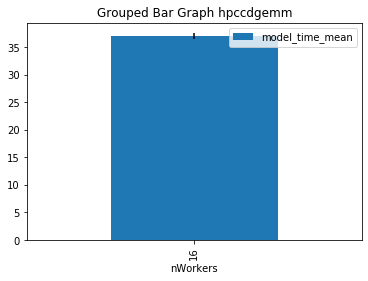

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [78]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [79]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccdgemm,16,4,16,0 days 00:02:03.500000,0 days 00:03:52.500860213,0 days 00:16:38.500000,0 days 00:00:16.883423823,0 days,0 days,0 days 00:19:23.110942426,0 days 00:03:36.895123987


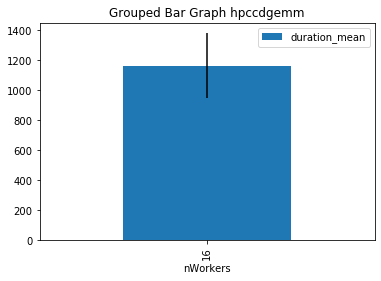

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [81]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [82]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccdgemm,16,1235.0,9985.0,0.0,11631.109424


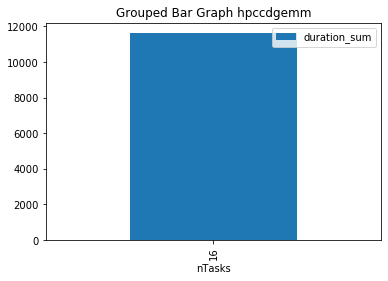

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [84]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccdgemm,0,16,4,16,2022-04-20 13:10:24+00:00,2022-04-20 13:10:32+00:00,2022-04-20 13:27:23+00:00,2022-04-20 13:27:23+00:00,0 days 00:17:42.606571128,36.7922,0 days 00:00:08,0 days 00:16:51,0 days,2022-04-20 13:10:24+00:00,0 days 00:00:00
1,hpccdgemm,1,16,4,16,2022-04-20 13:11:24+00:00,2022-04-20 13:11:31+00:00,2022-04-20 13:28:24+00:00,2022-04-20 13:28:24+00:00,0 days 00:17:42.629308013,36.5281,0 days 00:00:07,0 days 00:16:53,0 days,2022-04-20 13:10:24+00:00,0 days 00:01:00
2,hpccdgemm,2,16,4,16,2022-04-20 13:12:24+00:00,2022-04-20 13:12:31+00:00,2022-04-20 13:29:28+00:00,2022-04-20 13:29:28+00:00,0 days 00:17:42.694683459,36.4708,0 days 00:00:07,0 days 00:16:57,0 days,2022-04-20 13:10:24+00:00,0 days 00:02:00
3,hpccdgemm,3,16,4,16,2022-04-20 13:13:24+00:00,2022-04-20 13:13:32+00:00,2022-04-20 13:30:23+00:00,2022-04-20 13:30:23+00:00,0 days 00:17:42.606191423,36.4259,0 days 00:00:08,0 days 00:16:51,0 days,2022-04-20 13:10:24+00:00,0 days 00:03:00
4,hpccdgemm,4,16,4,16,2022-04-20 13:14:24+00:00,2022-04-20 13:14:32+00:00,2022-04-20 13:31:16+00:00,2022-04-20 13:31:16+00:00,0 days 00:17:32.600106346,36.9486,0 days 00:00:08,0 days 00:16:44,0 days,2022-04-20 13:10:24+00:00,0 days 00:04:00
5,hpccdgemm,5,16,4,16,2022-04-20 13:15:25+00:00,2022-04-20 13:15:32+00:00,2022-04-20 13:32:10+00:00,2022-04-20 13:32:10+00:00,0 days 00:17:21.610888949,36.8768,0 days 00:00:07,0 days 00:16:38,0 days,2022-04-20 13:10:24+00:00,0 days 00:05:01
6,hpccdgemm,6,16,4,16,2022-04-20 13:16:25+00:00,2022-04-20 13:16:31+00:00,2022-04-20 13:33:11+00:00,2022-04-20 13:33:11+00:00,0 days 00:17:31.576045512,36.9790,0 days 00:00:06,0 days 00:16:40,0 days,2022-04-20 13:10:24+00:00,0 days 00:06:01
7,hpccdgemm,7,16,4,16,2022-04-20 13:17:25+00:00,2022-04-20 13:17:32+00:00,2022-04-20 13:34:08+00:00,2022-04-20 13:34:08+00:00,0 days 00:17:21.591208892,37.3260,0 days 00:00:07,0 days 00:16:36,0 days,2022-04-20 13:10:24+00:00,0 days 00:07:01
8,hpccdgemm,8,16,4,16,2022-04-20 13:18:25+00:00,2022-04-20 13:28:14+00:00,2022-04-20 13:44:25+00:00,2022-04-20 13:44:25+00:00,0 days 00:26:41.594958538,37.7151,0 days 00:09:49,0 days 00:16:11,0 days,2022-04-20 13:10:24+00:00,0 days 00:08:01
9,hpccdgemm,9,16,4,16,2022-04-20 13:19:25+00:00,2022-04-20 13:29:13+00:00,2022-04-20 13:45:17+00:00,2022-04-20 13:45:17+00:00,0 days 00:26:31.599462006,38.1294,0 days 00:09:48,0 days 00:16:04,0 days,2022-04-20 13:10:24+00:00,0 days 00:09:01


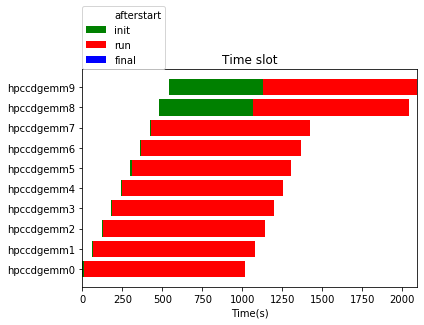

In [85]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
